In [8]:
import pandas as pd

train_df = pd.read_csv('/Users/yul/data/book/train.csv')
train_df

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book
...,...,...,...,...,...,...,...,...,...,...
871388,TRAIN_871388,USER_92096,BOOK_081138,0,34.0,"minneapolis, minnesota, usa",Healing Words: The Power of Prayer and the Pra...,Larry Dossey,1993.0,Harpercollins
871389,TRAIN_871389,USER_92097,BOOK_258124,0,35.0,"temple, texas, usa",The Salmon of Doubt: Hitchhiking the Galaxy On...,DOUGLAS ADAMS,2002.0,Harmony
871390,TRAIN_871390,USER_92098,BOOK_071848,0,45.0,"ottawa, ontario, canada",Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2000.0,Thorndike Press
871391,TRAIN_871391,USER_92099,BOOK_252599,8,43.0,"maple grove, minnesota, usa",Heartbreak Hill: Anatomy of a Ryder Cup,Tim Rosaforte,1996.0,St Martins Pr


In [6]:
def get_image_from_soup(soup):
    image_url = soup.find('meta', {'property': 'og:image'})['content']
    response = requests.get(image_url, stream=True).raw
    img = np.asarray(bytearray(response.read()), dtype="uint8")
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    return img

217829

In [14]:
from bs4 import BeautifulSoup

req = requests.get('https://product.kyobobook.co.kr/detail/S000001913217')

In [87]:
req = requests.get('https://product.kyobobook.co.kr/detail/S000001913217')
html = req.text
soup = BeautifulSoup(html, 'html.parser')

In [217]:
def get_author(soup):
    try:
        return soup.find('div', class_='author').find('a').text
    except:
        return None
    
def get_publisher(soup):
    try:
        return soup.find('div', class_='prod_info_text').find('a').text
    except:
        return None
    
def get_publish_date(soup):
    try:
        return soup.find('div', class_='publish_date').contents[-1].replace('·', '').strip()
    except:
        return None
    
def get_score(soup):
    try:
        return float(soup.find('span',{'class': 'review_score feel_lucky'}).text)
    except:
        return None
    
def get_categories(soup):
    try:
        categories_soup = soup.find_all('a', class_='intro_category_link')
        return [category.text for category in categories_soup]
    except:
        return None
    
def get_info_text(soup):
    try:
        info_soup = soup.find_all('div', class_='info_text')
        info_text_header = info_soup[0].text
        info_text = info_soup[1].text
        return info_text_header, info_text
    except:
        return None
    
def get_author_info(soup):
    try:
        return soup.find('p', {'class': 'info_text'}).text
    except:
        return None
    
def get_image(soup):
    try:
        return get_image_from_soup(soup)
    except:
        return None
    
def get_author_prod_names(soup):
    try:
        author_prod_names = soup.find_all('span',{'class': 'prod_name'})
        return [prod_name.text for prod_name in author_prod_names]
    except:
        return None


In [222]:
import time
books = {}
prod_id = 201507091
for idx in range(100):
    url_prod_id = f'S000{prod_id}'
    req = requests.get(f'https://product.kyobobook.co.kr/detail/{url_prod_id}')
    html = req.text
    soup = BeautifulSoup(html, 'html.parser')
    books[url_prod_id] = [get_author(soup), get_author_info(soup), get_author_prod_names(soup), get_categories(soup), get_image(soup), get_info_text(soup), get_publish_date(soup), get_publisher(soup), get_score(soup)]
    print(books[url_prod_id])
    time.sleep(3)
    prod_id -= 1

['악동 김블루', '170만 명 구독자를 보유한 ‘악동 김블루’ 채널의 인기 크리에이터. 재치 넘치는 입담, 뛰어난 콘텐츠 기획력으로 고정 팬 층이 두터워요. ‘긍정적으로 생각해. 도전해. 과감하게! 게을러지지 마. 자만하지 마. 욕심부리지 마.’와 같은 자신의 가치관을 팬들과 공유하며 함께 성장해 나가고자 열성을 쏟아요.', ['악동 김블루의 친절한 과학 2(양장본 Hardcover)', '악동 김블루의 친절한 과학 1', '가족 시트콤 웃짜가족 3(양장본 Hardcover)', 'LIVE 세계사 10: 튀르키예(양장본 Hardcover)', '악동 김블루의 친절한 과학 2(양장본 Hardcover)', '가족 시트콤 웃짜가족 2(양장본 Hardcover)', 'Live 세계사 3: 프랑스', '가족 시트콤 웃짜가족 1(양장본 Hardcover)', '일렉트론 영웅전 6: 로봇과 인공지능', 'Why? 과학학습만화 전100권(본책 100권+워크북 100권)', 'Why? 인문사회교양만화 SNS', '뽀송이의 여행(양장본 Hardcover)', '악동 김블루의 친절한 과학 1', '찾아봐 찾아봐 12: 시계 나라를 탈출한 숫자들(양장본 Hardcover)', '찾아봐 찾아봐 12: 시계나라를 탈출한 숫자들', '지금도 어린, 어린왕자', '곤충보다 작아진 정브르 4', '그로봇 2', '말이야와 친구들 7(양장본 Hardcover)', '곤충 탐정 정브르 1~3권 세트(양장본 Hardcover)', '총몇명 공포의 술래잡기: 수수께끼 폐병원', '태쁘의 퇴마부 6', '곤충 탐정 정브르 3: 반딧불이의 보물을 지켜라!(양장본 Hardcover)', '슈뻘맨의 숨은 과학 찾기 1', '토깽이네 지구 구출 대작전 6', '여기는 루퐁이네: 안녕? 천사들'], ['국내도서', '어린이(초등)', '어린이만화', '학습만화', '과학/컴퓨터', '국내도서', '어린이(초등)', '초등1-6학년', '어린이만화', '학습만화'], array([[[205, 130,  

In [221]:
url_prod_id

'S000201507075'

In [216]:
author = soup.find('div', class_='author').find('a').text
prod_info_text = soup.find('div', class_='prod_info_text').find('a').text
publish_date = soup.find('div', class_='publish_date').contents[-1].replace('·', '').strip()
score = float(soup.find('span',{'class': 'review_score feel_lucky'}).text)
categories_soup = soup.find_all('a', class_='intro_category_link')
categories = [category.text for category in categories_soup]
info_soup = soup.find_all('div', class_='info_text')
info_text_header = info_soup[0].text
info_text = info_soup[1].text
author_info = soup.find('p', {'class': 'info_text'}).text
image = get_image_from_soup(soup)
author_prod_names = soup.find_all('span',{'class': 'prod_name'})
author_prod_names = [prod_name.text for prod_name in author_prod_names]
author, prod_info_text, publish_date, score, categories, info_text_header, info_text, author_info, image, author_prod_names

('김승호',
 '스노우폭스북스',
 '2020년 06월 15일',
 9.7,
 ['국내도서', '경제/경영', '재테크/금융', '재테크', '부자되는법'],
 '2020ㆍ2021ㆍ2022 3년 연속 최장기 베스트셀러 60만 깨어있는 독자들이 선택한 경제경영 필독서 『돈의 속성』 ▶ 『돈의 속성』 200쇄 기념 개정증보판 발행! ▶ 『돈의 속성』 200쇄 기념, 김승호 회장의 추가 메시지를 담다! ▶ 중국, 일본, 대만, 태국 4개국 출간!',
 '이 책은 초판 발행 후, 경제경영 필도서로 자리매김한 『돈의 속성』  200쇄 기념 개정증보판이다. 200쇄에 맞춰 코로나19로 바뀐 경제상황과 돈에 관한 김승호 회장의 추가 메시지를 담았다. 『돈의 속성』은 3년 전 어느 극장 하나를 빌려 대중에게 강의했던 내용을 기반으로 집필됐다. 강연은 방송을 통해 전파되며 유튜브와 셀럽들에 의해 공유와 전파를 거듭했다. 그리고 이내 1,100만 명에게 전달되기에 이르렀다. 하지만 여러 사람을 통해 생산 및 재생산되는 과정에서 어떤 의미는 그 뜻이 정확히 전달되지 않았거나 의미가 왜곡되는 일이 있었다.몇 권을 저술한 저자지만 여전히 책 쓰기가 가장 어렵다는 그는 이런 상황에서 다시 한 번 펜을 잡기로 결정했다. 그것은 그의 내면에 깃든 사람에 대한 애정 때문이었다. 모두에게 정말 필요하고 중요하지만 아무도 말하지 않는 진짜 돈 버는 방법, 진짜 돈을 벌어본 사람은 그 누구도 방법을 공유하지 않기에 이 일이 저자 자신에게 주어진 것이라 받아들였다. 젊은 날의 자신의 모습이 투영되기에.어떤 횡재나 일명 대박주식 없이 말 그대로 맨손에서 만들어낸 종잣돈으로 돈 버는 방법을 알려준다. 부모에게 받은 유산은커녕, 30대 후반까지 낡은 자동차에 그날 판매할 과일을 싣고 다니던 어느 가난한 이민 가장이 이룬 진짜 부에 대한 모든 방법이 담겼다. 종잣돈 천만 원을 만들고 그 돈을 1억 원, 10억 원, 100억 원, 수천억 원이 될 때까지 돈을 관리하며 터득한 ‘돈’이 가진 속성을 정리한 

In [203]:
image_url = soup.find('meta', {'property': 'og:image'})['content']

In [214]:
author_prod_names = soup.find_all('span',{'class': 'prod_name'})
author_prod_names = [prod_name.text for prod_name in author_prod_names]

['사장학개론', '알면서도 알지 못하는 것들(리커버 에디션)', '생각의 비밀', '김밥파는 CEO', '자기경영노트']

In [209]:
get_image_from_soup(soup)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 69, 122, 165],
        [ 69, 122, 165],
        [ 69, 122, 165],
        ...,
        [ 68, 121, 164],
        [ 68, 121, 164],
        [ 68, 121, 164]],

       [[ 69, 122, 165],
        [ 69, 122, 165],
        [ 69, 122, 165],
        ...,
        [ 68, 121, 164],
        [ 68, 121, 164],
        [ 68, 121, 164]],

       [[ 69, 122, 165],
        [ 69, 122, 165],
        [ 69, 122, 165],
        ...,
        [ 68, 121, 164],
        [ 68, 121, 164],
        [ 68, 121, 164]]

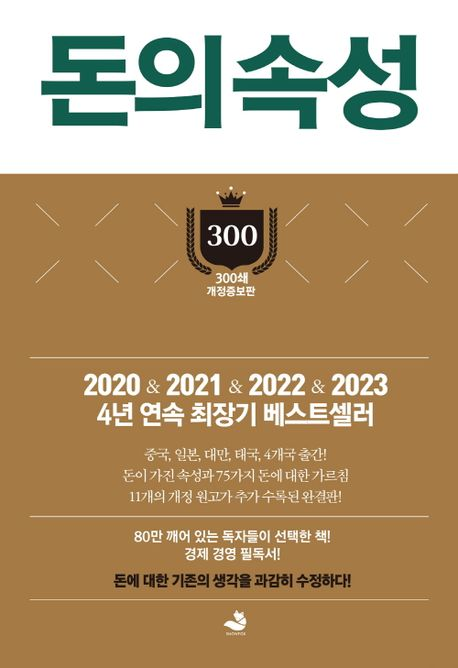

In [207]:
import cv2
import numpy as np
import requests

response = requests.get(image_url, stream=True).raw
img = np.asarray(bytearray(response.read()), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_COLOR)
from yullab.visualization.image import show_cv_image

show_cv_image(img)

In [175]:
def find_substring(txt, str1, n):
  parts = txt.split(str1, n + 1)
  if len(parts) <= n + 1:
    return -1
  return len(txt) - len(parts[-1]) - len(str1)

In [179]:
string = script[name_idx+len('name'):]
idx = string.find('"', string.find('"')+1)
string[idx:]
idx = find_substring(string, '"', 3)
string[idx:]

'"image": "https://contents.kyobobook.co.kr/sih/fit-in/458x0/pdt/9791188331796.jpg",\n   "description": "돈의 속성(200쇄 리커버에디션) | 2020ㆍ2021ㆍ2022 3년 연속 최장기 베스트셀러 60만 깨어있는 독자들이 선택한 경제경영 필독서 『돈의 속성』 ▶ 『돈의 속성』 200쇄 기념 개정증보판 발행! ▶ 『돈의 속성』 200쇄 기념, 김승호 회장의 추가 메시지를 담다! ▶ 중국……",\n   "genre": "경제/경영",\n   "keywords": "부자되는법, 경제철학, 종잣돈, 9791188331796",\n   "aggregateRating": {\n        "@type": "AggregateRating",\n        "ratingValue": "9.7",\n        "ratingCount": "1568",\n        "bestRating": "10",\n        "worstRating": "0"\n   },\n   "author": {\n        "@type": "Person",\n        "name": "김승호",\n   }\n   "publisher": {\n        "@type": "Organization",\n        "name": "스노우폭스북스",\n   },\n   "url": "https://product.kyobobook.co.kr/detail/S000001913217",\n   "workExample" : [{\n        "@type": "Book",\n        "isbn": "9791188331796",\n        "bookFormat" : "https://schema.org/Paperback",\n        "datePublished" : "20200615",\n        "potentialAction": {\n           "@type": "ReadAction"

In [182]:
name_idx =script.find('name')
start_name = script[name_idx+len('name'):]
start_name.replace('')
# name_end_idx =start_name.find('"')
# name = start_name[:name_end_idx]
# name

'" : "돈의 속성(200쇄 리커버에디션)",\n   "image": "https://contents.kyobobook.co.kr/sih/fit-in/458x0/pdt/9791188331796.jpg",\n   "description": "돈의 속성(200쇄 리커버에디션) | 2020ㆍ2021ㆍ2022 3년 연속 최장기 베스트셀러 60만 깨어있는 독자들이 선택한 경제경영 필독서 『돈의 속성』 ▶ 『돈의 속성』 200쇄 기념 개정증보판 발행! ▶ 『돈의 속성』 200쇄 기념, 김승호 회장의 추가 메시지를 담다! ▶ 중국……",\n   "genre": "경제/경영",\n   "keywords": "부자되는법, 경제철학, 종잣돈, 9791188331796",\n   "aggregateRating": {\n        "@type": "AggregateRating",\n        "ratingValue": "9.7",\n        "ratingCount": "1568",\n        "bestRating": "10",\n        "worstRating": "0"\n   },\n   "author": {\n        "@type": "Person",\n        "name": "김승호",\n   }\n   "publisher": {\n        "@type": "Organization",\n        "name": "스노우폭스북스",\n   },\n   "url": "https://product.kyobobook.co.kr/detail/S000001913217",\n   "workExample" : [{\n        "@type": "Book",\n        "isbn": "9791188331796",\n        "bookFormat" : "https://schema.org/Paperback",\n        "datePublished" : "20200615",\n        "potentialAction": {\n  

In [164]:
def get_property(property_name):
    idx = script.find(property_name)
    property_start = script[idx+len(property_name)+5:]
    end_idx =property_start.find('"')
    return property_start[:end_idx]

In [168]:
print(get_property('name'))
print(get_property('image'))
print(get_property('description'))
print(get_property('genre'))


돈의 속성(200쇄 리커버에디션)
ttps://contents.kyobobook.co.kr/sih/fit-in/458x0/pdt/9791188331796.jpg
의 속성(200쇄 리커버에디션) | 2020ㆍ2021ㆍ2022 3년 연속 최장기 베스트셀러 60만 깨어있는 독자들이 선택한 경제경영 필독서 『돈의 속성』 ▶ 『돈의 속성』 200쇄 기념 개정증보판 발행! ▶ 『돈의 속성』 200쇄 기념, 김승호 회장의 추가 메시지를 담다! ▶ 중국……
제/경영


In [131]:
soup.find('div', class_='review_score')

In [128]:
publish_date = soup.find('div', class_='publish_date').contents[-1].replace('·', '').strip()#.strip()

'2020년 06월 15일'

In [69]:
import json
json.loads(test)

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 663 (char 662)

In [38]:
import json

data = json.loads(soup.find('script', type='application/ld+json').text)
# print(data['video']['transcript']) 

JSONDecodeError: Expecting property name enclosed in double quotes: line 20 column 4 (char 683)